# Code that generates dataset from a file of images and json for tagging:

expects a renders file with the otuput generated by the ImageGen.blend blender file
1. Install blender via the website or steam
2. Open up the .blend file and go to the scripting tab on the top of the screen
3. Click on the small run button towards the top of the script window
4. It not responding is normal dont touch it while it runs
5. A render directory should be created with the expected output

## 1. Load and process the images

In [21]:
%matplotlib inline
import joblib
from skimage.io import imread
from skimage.transform import resize
import time
import random
from progressbar import ProgressBar

In [4]:
## Load the training set
# To speed up computation, we will just consider 2000 images for training and 500 images for testing
num_trn, num_tst = 2000,500
train_data = np.load('mnist_train_data.npy')[:num_trn,]
train_labels = np.load('mnist_train_labels.npy')[:num_trn]

## Load the testing set
test_data = np.load('mnist_test_data.npy')[:num_tst,]
test_labels = np.load('mnist_test_labels.npy')[:num_tst]


## Print out their dimensions
print("Training dataset dimensions: ", np.shape(train_data))
print("Number of training labels: ", len(train_labels))
print("Testing dataset dimensions: ", np.shape(test_data))
print("Number of testing labels: ", len(test_labels))

## Compute the number of examples of each digit
train_digits, train_counts = np.unique(train_labels, return_counts=True)
print("Training set distribution:")
print(dict(zip(train_digits, train_counts)))

test_digits, test_counts = np.unique(test_labels, return_counts=True)
print("Test set distribution:")
print(dict(zip(test_digits, test_counts)))



Training dataset dimensions:  (2000, 784)
Number of training labels:  2000
Testing dataset dimensions:  (500, 784)
Number of testing labels:  500
Training set distribution:
{0: 204, 1: 219, 2: 200, 3: 209, 4: 186, 5: 194, 6: 189, 7: 200, 8: 214, 9: 185}
Test set distribution:
{0: 49, 1: 53, 2: 63, 3: 42, 4: 49, 5: 43, 6: 42, 7: 56, 8: 48, 9: 55}


Now, let's randomly choose 10 images from the training dataset and visualize them.

[1411, 1699, 1092, 1835, 42, 492, 785, 1202, 1767, 1859]


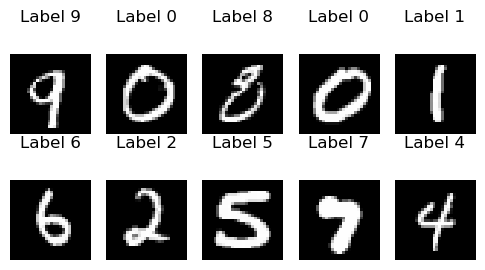

In [105]:
nrows, ncols = 2, 5
index = random.sample(range(len(train_labels)), 10)
print (index)
fig, axes = plt.subplots(nrows, ncols, figsize=(6, 3))
for i in range(nrows):
    for j in range(ncols):
        # Image index
        k = j + i * ncols
        ax = axes[i, j]
        ax.matshow((train_data[index[k],]).reshape((28,28)),cmap=plt.cm.gray)
        ax.set_axis_off()
        ax.set_title("Label " + str(train_labels[index[k]]))